In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

2024-07-25 08:03:06.636425: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 08:03:06.636527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 08:03:06.745071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# Define paths
train_dir = '/content/drive/MyDrive/Colab Notebooks/New/train/'
test_dir = '/content/drive/MyDrive/Colab Notebooks/New/test/'

# ImageDataGenerator for loading and augmenting data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15)  # Using 15% of the data for validation

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


Found 2040 images belonging to 2 classes.
Found 360 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
# Load the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])
from tensorflow.keras.optimizers import Adam
# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 22852898 (87.18 MB)
Trainable params: 10501

In [ ]:

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/63 ━━━━━━━━━━━━━━━━━━━━ 27:19 26s/step - accuracy: 0.4375 - loss: 0.9023

I0000 00:00:1721894629.085498      92 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721894629.145072      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.8403 - loss: 0.4397

W0000 00:00:1721894658.480532      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.8431 - loss: 0.4320

W0000 00:00:1721894665.314730      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 624ms/step - accuracy: 0.8445 - loss: 0.4283 - val_accuracy: 0.9233 - val_loss: 0.1762
Epoch 2/10
 1/63 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 1.0000 - loss: 0.0057

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.1668
Epoch 3/10


W0000 00:00:1721894676.893628      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.9864 - loss: 0.0394 - val_accuracy: 0.9119 - val_loss: 0.3872
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.9688 - loss: 0.0425 - val_accuracy: 0.8750 - val_loss: 0.5655
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.9969 - loss: 0.0091 - val_accuracy: 0.9432 - val_loss: 0.2021
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0122
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9318 - val_loss: 0.2701
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.8750 - val_loss: 0.4838
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - accuracy: 0.9996 - loss: 0.0026 - val_accuracy: 0.9290 - val_loss: 0.3496
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 -

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

Output hidden; open in https://colab.research.google.com to view.

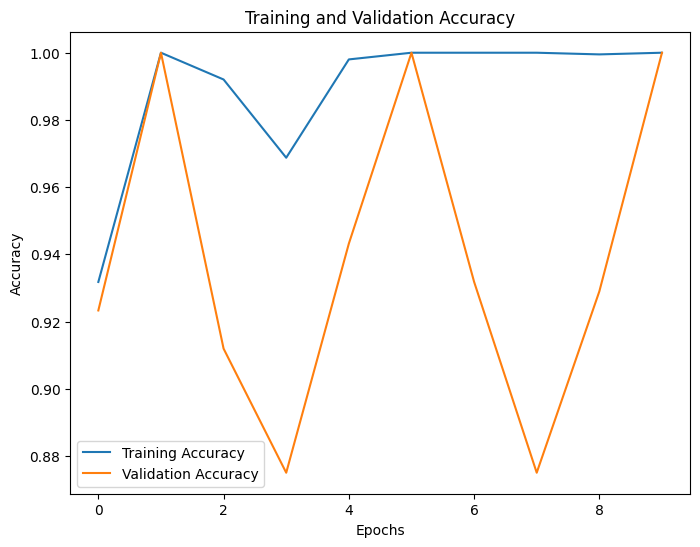

In [ ]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/19 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step

W0000 00:00:1721894737.330837      94 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 524ms/step


W0000 00:00:1721894746.759213      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Accuracy: 0.9533
Precision: 0.9964
Recall: 0.9100
F1-score: 0.9512
Confusion Matrix
[[299   1]
 [ 27 273]]
Classification Report
              precision    recall  f1-score   support

  NoActivity       0.92      1.00      0.96       300
 YesActivity       1.00      0.91      0.95       300

    accuracy                           0.95       600
   macro avg       0.96      0.95      0.95       600
weighted avg       0.96      0.95      0.95       600



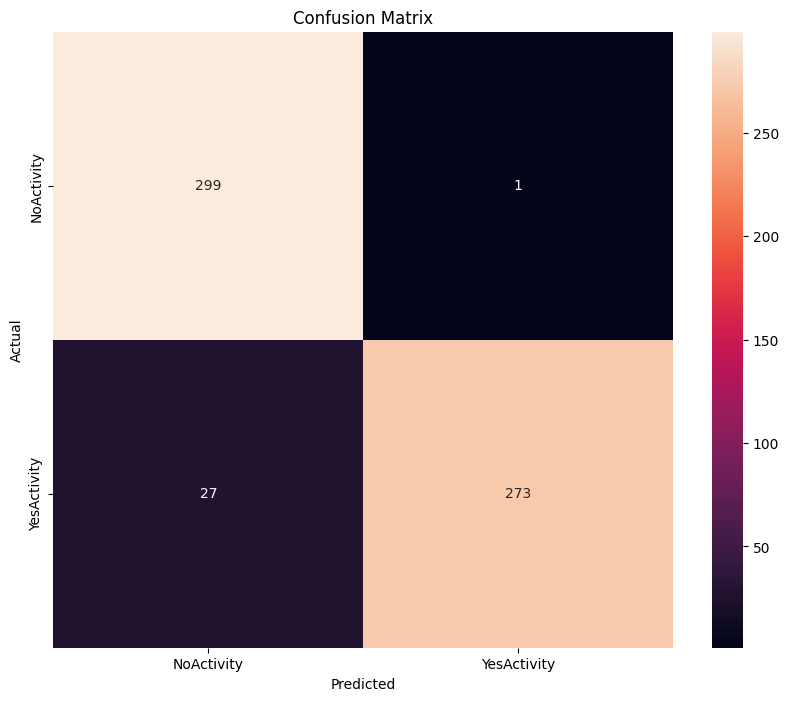

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model
test_generator.reset()
Y_pred = model.predict(test_generator, test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)



accuracy = accuracy_score(test_generator.classes, y_pred)
precision = precision_score(test_generator.classes, y_pred)
recall = recall_score(test_generator.classes, y_pred)
f1 = f1_score(test_generator.classes, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# Confusion matrix and classification report
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
cm_plot_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=cm_plot_labels, yticklabels=cm_plot_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()